# Credit Fraud Detection

## STEP 1: Import libraries

In [2]:
!pip install -U imbalanced-learn
import time, datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## STEP 2: Read Dataset

In [3]:
fraud_creditcard = pd.read_csv("C:/Users/Denis/Datasets/Credit_Card_Fraud/card_transdata.csv")

fraud_creditcard.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## STEP 3: EXPLORATORY DATA ANALYSIS

### Numbers of columns and rows

In [4]:
fraud_creditcard.shape

(1000000, 8)

### Info about columns

In [5]:
fraud_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Descriptions

In [6]:
fraud_creditcard.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### HeatMap

<Axes: >

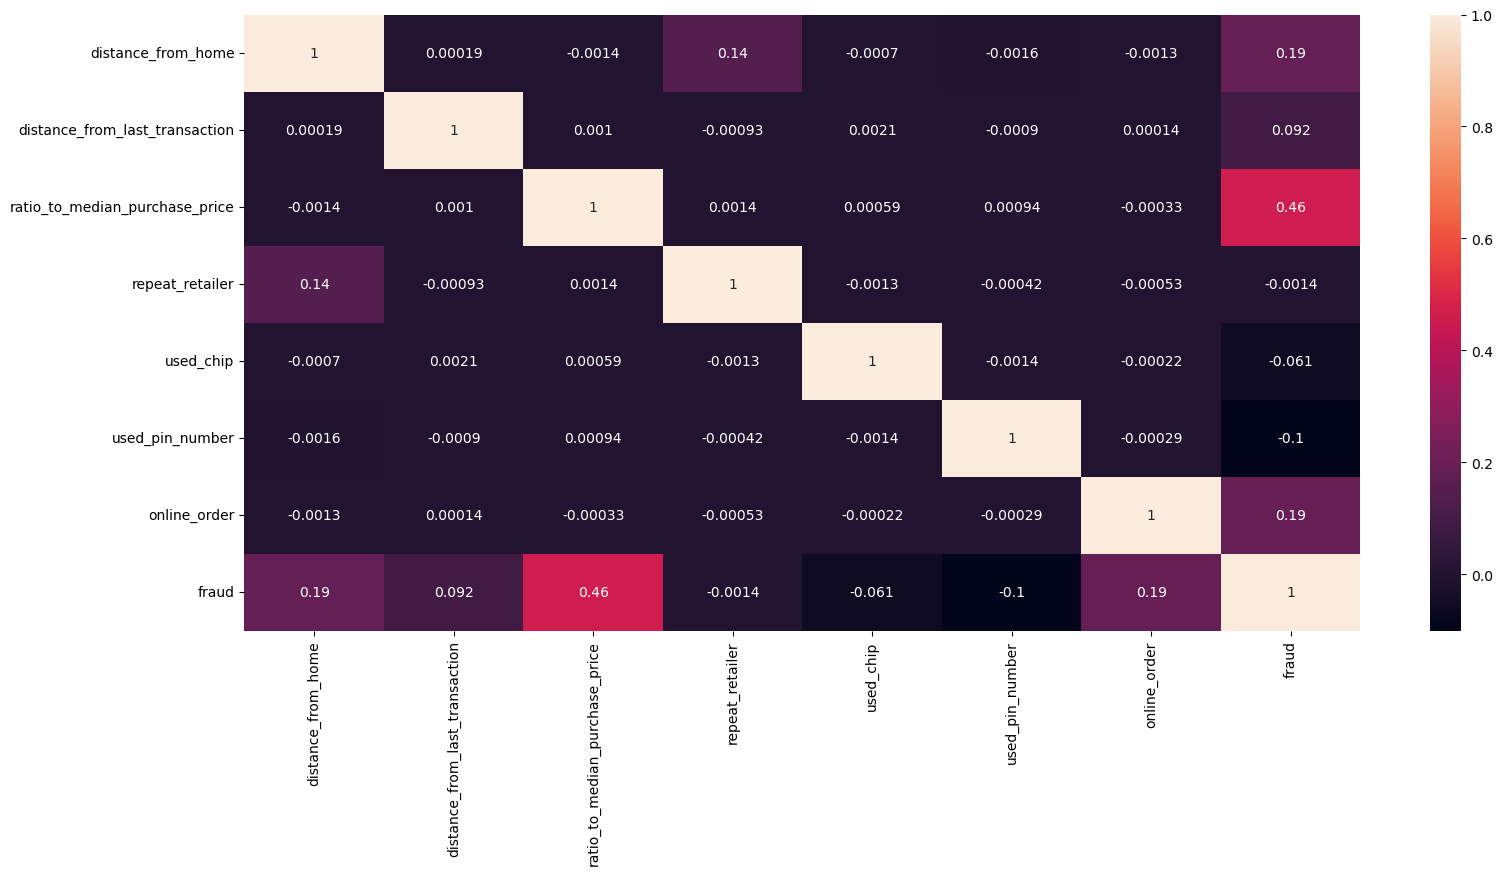

In [7]:
plt.figure(figsize=(18,8))
sns.heatmap(fraud_creditcard.corr(), annot=True)

### Histograms

array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>,
        <Axes: title={'center': 'fraud'}>, <Axes: >]], dtype=object)

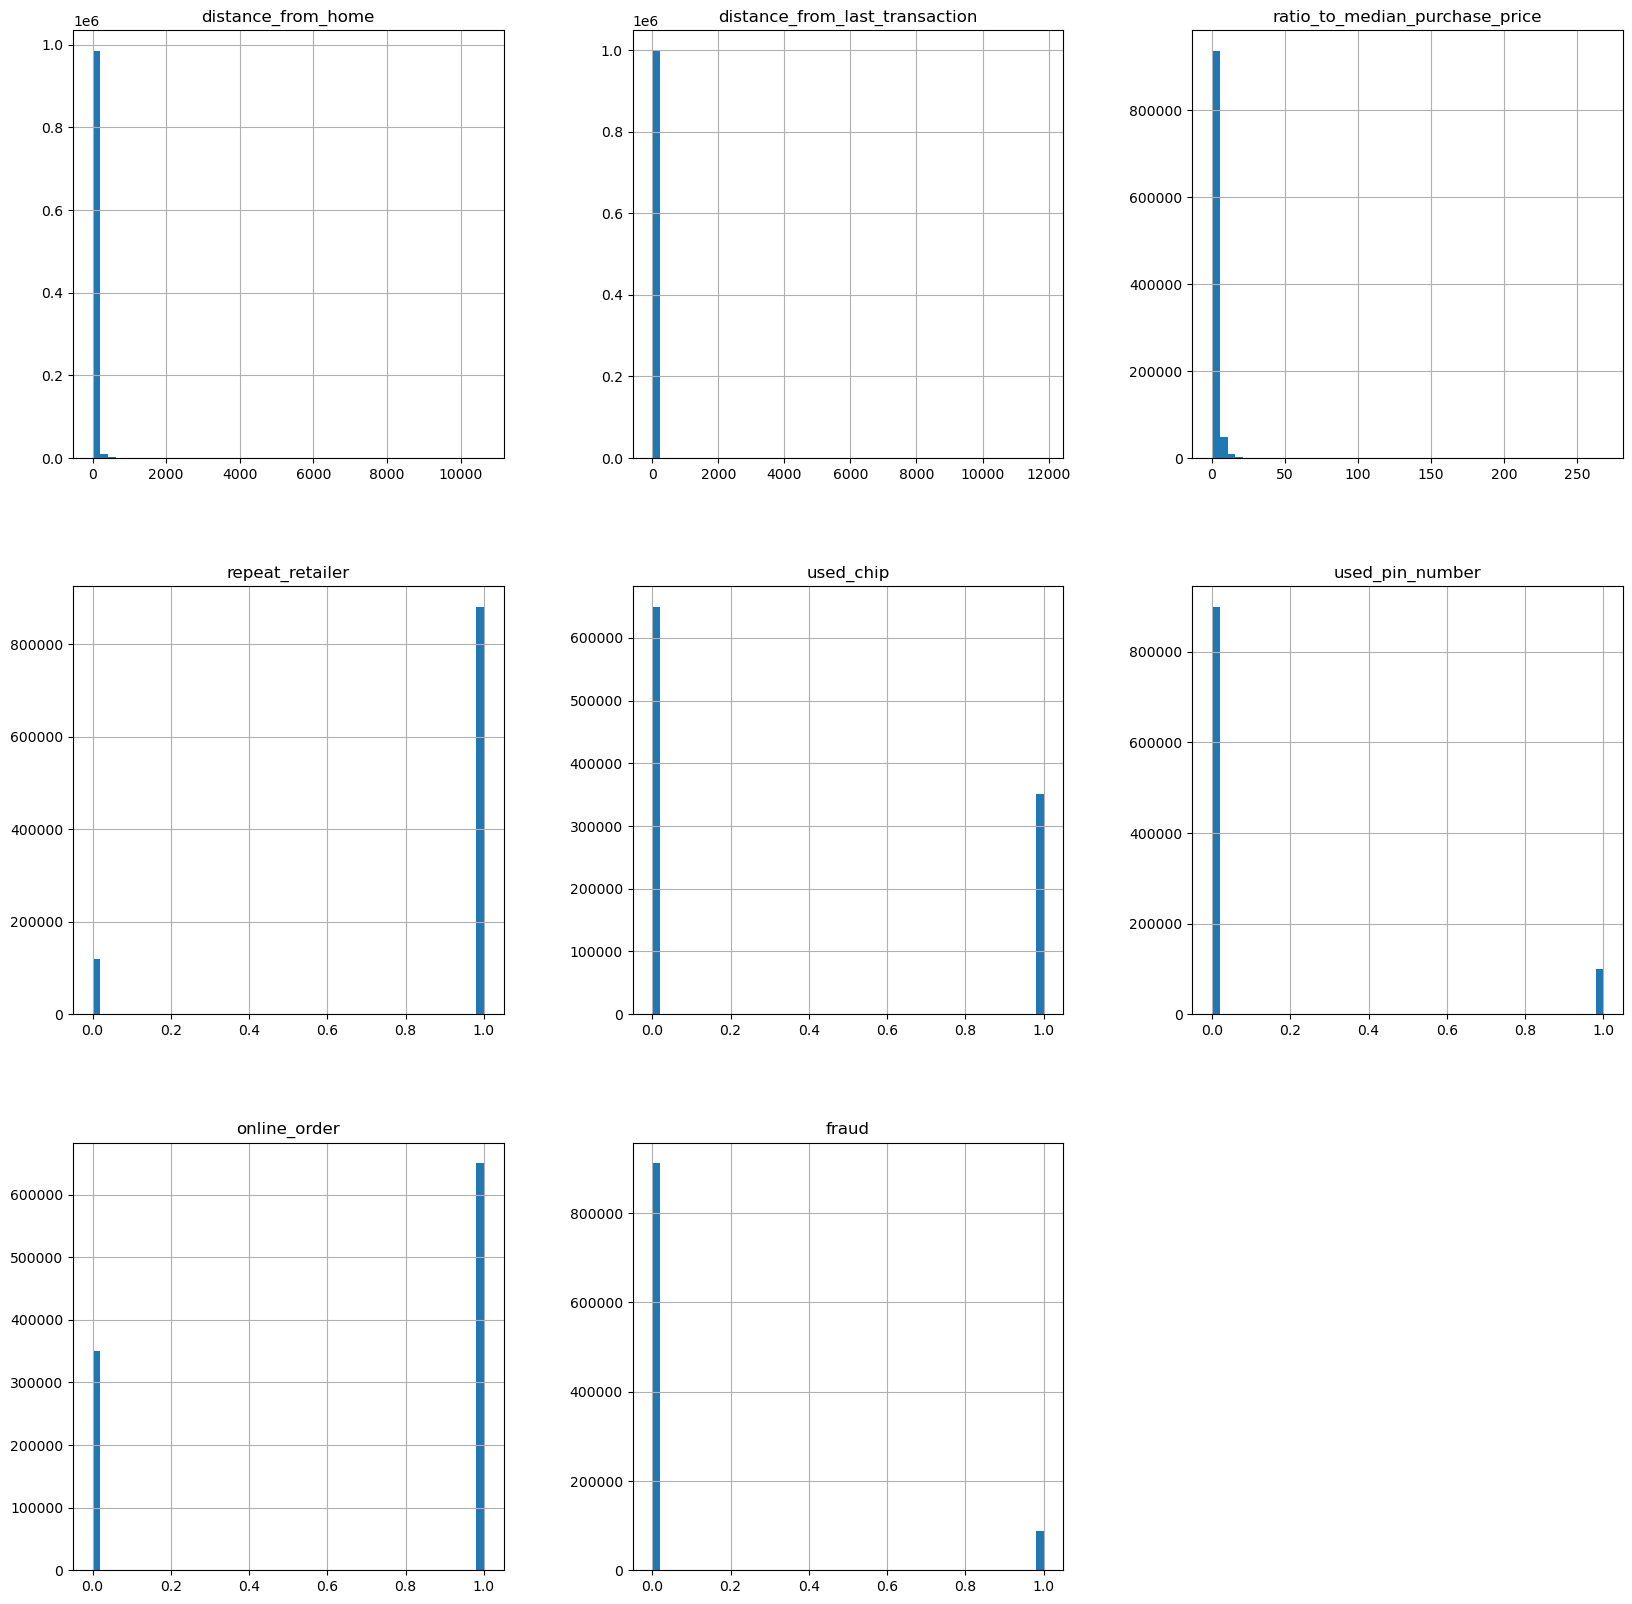

In [8]:
fraud_creditcard.hist(bins=50, figsize=(20, 20))

## STEP 4: Imbalanced dataset

<Axes: xlabel='fraud'>

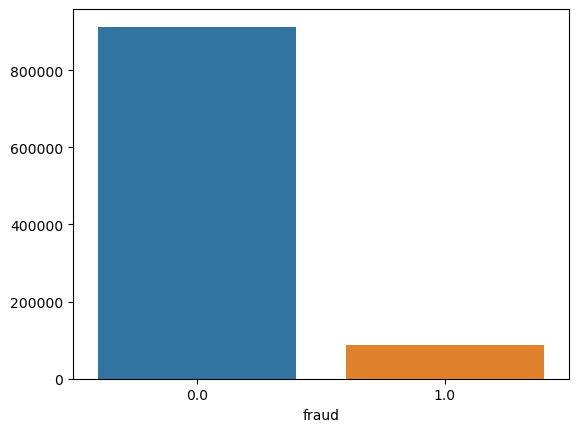

In [10]:
sns.barplot(x=fraud_creditcard["fraud"].value_counts().index, y=fraud_creditcard["fraud"].value_counts().values)

In [11]:
fraud_creditcard["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [12]:
X = fraud_creditcard.drop("fraud",axis=1)
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [13]:
y = fraud_creditcard["fraud"]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [14]:
(y.value_counts() / y.shape[0]) * 100

fraud
0.0    91.2597
1.0     8.7403
Name: count, dtype: float64

## STEP 5: Split the dataset using stratify

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [16]:
y_train.value_counts()

fraud
0.0    638818
1.0     61182
Name: count, dtype: int64

### Maintain the same proportion

In [17]:
(y_train.value_counts()/y_train.shape[0]) * 100

fraud
0.0    91.259714
1.0     8.740286
Name: count, dtype: float64

In [18]:
(y_test.value_counts()/y_test.shape[0]) * 100

fraud
0.0    91.259667
1.0     8.740333
Name: count, dtype: float64

## STEP 6: Train and evaluate models

### Logistic Regression

In [57]:
ins_lr = LogisticRegression(max_iter=1000)

In [58]:
%%time
ins_lr.fit(X_train, y_train)

CPU times: total: 2.66 s
Wall time: 3.22 s


LogisticRegression(max_iter=1000)

In [59]:
%%time
pred_lr = ins_lr.predict(X_test)

CPU times: total: 0 ns
Wall time: 6.47 ms


In [60]:
pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
accuracy_score(y_test, pred_lr)

0.9588266666666667

### In imbalanced datasets, overall accuracy is often very high. However, accuracy does not reflect the model's quality regarding the minority class.

In [62]:
recall_score(y_test, pred_lr)

0.6024179093093323

In [63]:
precision_score(y_test, pred_lr)

0.8912712294758224

In [64]:
confusion_matrix(y_test, pred_lr)

array([[271852,   1927],
       [ 10425,  15796]], dtype=int64)

### Decision Tree

In [65]:
ins_dt = DecisionTreeClassifier(random_state=0)

In [66]:
%%time
ins_dt.fit(X_train, y_train)

CPU times: total: 1.77 s
Wall time: 2.13 s


DecisionTreeClassifier(random_state=0)

In [67]:
%%time
pred_dt = ins_dt.predict(X_test)

CPU times: total: 0 ns
Wall time: 18.8 ms


In [68]:
accuracy_score(y_test, pred_dt)

0.9999766666666666

In [69]:
recall_score(y_test, pred_dt)

0.9998474505167614

In [70]:
precision_score(y_test, pred_dt)

0.9998855835240275

In [71]:
confusion_matrix(y_test,pred_dt)

array([[273776,      3],
       [     4,  26217]], dtype=int64)

### Naive Bayes

In [72]:
ins_nb = GaussianNB()

In [73]:
%%time
ins_nb.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 136 ms


GaussianNB()

In [74]:
%%time
pred_nb = ins_nb.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 36.1 ms


In [75]:
accuracy_score(y_test, pred_nb)

0.94803

In [76]:
recall_score(y_test, pred_nb)

0.5815567674764501

In [77]:
precision_score(y_test, pred_nb)

0.7675156029796658

In [78]:
confusion_matrix(y_test, pred_nb)

array([[269160,   4619],
       [ 10972,  15249]], dtype=int64)

### K-nearest neighbor 

In [79]:
ins_knn = KNeighborsClassifier(n_neighbors=5)

In [80]:
%%time
ins_knn.fit(X_train, y_train)

CPU times: total: 1.19 s
Wall time: 1.34 s


KNeighborsClassifier()

In [81]:
%%time
pred_knn = ins_knn.predict(X_test)

CPU times: total: 17.2 s
Wall time: 20.4 s


In [82]:
accuracy_score(y_test, pred_knn)

0.9834766666666667

In [83]:
recall_score(y_test, pred_knn)

0.9233438846725907

In [84]:
precision_score(y_test, pred_knn)

0.8914868547021135

In [85]:
confusion_matrix(y_test, pred_knn)

array([[270832,   2947],
       [  2010,  24211]], dtype=int64)

## STEP 7: Sampling

## Under Sampling

In [86]:
rus_us = RandomUnderSampler(random_state=0)

In [87]:
X_train_us, y_train_us = rus_us.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

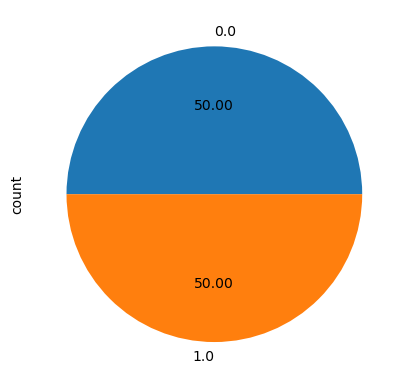

In [88]:
y_train_us.value_counts().plot.pie(autopct='%.2f')

In [89]:
y_train_us.value_counts()

fraud
0.0    61182
1.0    61182
Name: count, dtype: int64

### Logistic Regression

In [90]:
ins_lr_us = LogisticRegression(max_iter=1000)

In [91]:
%%time
ins_lr_us.fit(X_train_us, y_train_us)

LogisticRegression(max_iter=1000)

In [103]:
%%time
pred_lr_us = ins_lr_us.predict(X_test)

CPU times: total: 0 ns
Wall time: 7.6 ms


In [104]:
accuracy_score(y_test, pred_lr_us)

0.9336066666666667

In [105]:
recall_score(y_test, pred_lr_us)

0.9473322909118645

In [106]:
precision_score(y_test, pred_lr_us)

0.5726537104917353

In [107]:
confusion_matrix(y_test, pred_lr_us)

array([[255242,  18537],
       [  1381,  24840]], dtype=int64)

### Decision Tree

In [108]:
ins_dt_us = DecisionTreeClassifier(random_state=0)

In [109]:
%%time
ins_dt_us.fit(X_train_us, y_train_us)

CPU times: total: 234 ms
Wall time: 261 ms


DecisionTreeClassifier(random_state=0)

In [110]:
%%time
pred_dt_us = ins_dt_us.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 16.5 ms


In [111]:
accuracy_score(y_test, pred_dt_us)

0.9999033333333334

In [112]:
recall_score(y_test, pred_dt_us)

1.0

In [113]:
precision_score(y_test, pred_dt_us)

0.9988952380952381

In [114]:
confusion_matrix(y_test, pred_dt_us)

array([[273750,     29],
       [     0,  26221]], dtype=int64)

### Naive Bayes

In [122]:
ins_nb_us = GaussianNB()

In [124]:
%%time
ins_nb_us.fit(X_train_us, y_train_us)

CPU times: total: 15.6 ms
Wall time: 32.2 ms


GaussianNB()

In [125]:
%%time
pred_nb_us = ins_nb_us.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 38 ms


In [126]:
accuracy_score(y_test, pred_nb_us)

0.88947

In [127]:
recall_score(y_test, pred_nb_us)

0.9622821402692499

In [128]:
precision_score(y_test, pred_nb_us)

0.4395665656248911

In [129]:
confusion_matrix(y_test, pred_nb_us)

array([[241609,  32170],
       [   989,  25232]], dtype=int64)

### K-nearest neighbor

In [130]:
ins_knn_us = KNeighborsClassifier(n_neighbors=5)

In [131]:
%%time
ins_knn_us.fit(X_train_us, y_train_us)

CPU times: total: 125 ms
Wall time: 130 ms


KNeighborsClassifier()

In [132]:
%%time
pred_knn_us = ins_knn_us.predict(X_test)

CPU times: total: 10.9 s
Wall time: 11.8 s


In [133]:
accuracy_score(y_test, pred_knn_us)

0.93936

In [134]:
recall_score(y_test, pred_knn_us)

0.9973685214141337

In [135]:
precision_score(y_test, pred_knn_us)

0.5906719367588933

In [136]:
confusion_matrix(y_test, pred_knn_us)

array([[255656,  18123],
       [    69,  26152]], dtype=int64)

## Over Sampling

In [137]:
rus_os = RandomOverSampler(random_state=0)

In [138]:
X_train_os, y_train_os = rus_os.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

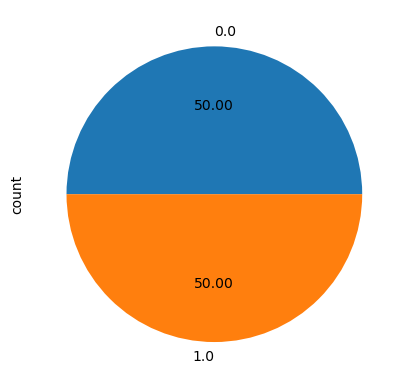

In [139]:
y_train_os.value_counts().plot.pie(autopct='%.2f')

In [140]:
y_train_os.value_counts()

fraud
0.0    638818
1.0    638818
Name: count, dtype: int64

### Logistic Regression

In [141]:
ins_rus_os = LogisticRegression(max_iter=1000)

In [142]:
%%time
ins_rus_os.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000)

In [143]:
%%time
pred_rus_os = ins_rus_os.predict(X_test)

In [144]:
accuracy_score(y_test, pred_rus_os)

0.9339733333333333

In [82]:
recall_score(y_test, pred_rus_os)

0.9496205331604439

In [83]:
precision_score(y_test, pred_rus_os)

0.5757491675915649

In [145]:
confusion_matrix(y_test,pred_rus_os)

array([[255376,  18403],
       [  1405,  24816]], dtype=int64)

### Decision Tree

In [146]:
ins_dt_os = DecisionTreeClassifier(random_state=0)

In [147]:
%%time
ins_dt_os.fit(X_train_os, y_train_os)

CPU times: total: 2.48 s
Wall time: 2.59 s


DecisionTreeClassifier(random_state=0)

In [148]:
%%time
pred_dt_os = ins_dt_os.predict(X_test)

CPU times: total: 0 ns
Wall time: 15.9 ms


In [149]:
accuracy_score(y_test, pred_dt_os)

0.99998

In [150]:
recall_score(y_test, pred_dt_os)

0.9998474505167614

In [151]:
precision_score(y_test, pred_dt_os)

0.9999237194401007

In [152]:
confusion_matrix(y_test, pred_dt_os)

array([[273777,      2],
       [     4,  26217]], dtype=int64)

### Naive Bayes

In [153]:
ins_nb_os = GaussianNB()

In [158]:
%%time
ins_nb_os.fit(X_train_os, y_train_os)

CPU times: total: 172 ms
Wall time: 205 ms


GaussianNB()

In [159]:
%%time
pred_nb_os = ins_nb_os.predict(X_test)

CPU times: total: 0 ns
Wall time: 36.7 ms


In [160]:
accuracy_score(y_test, pred_nb_os)

0.91787

In [161]:
recall_score(y_test, pred_nb_os)

0.9632355745394913

In [162]:
precision_score(y_test, pred_nb_os)

0.5161652906073735

In [163]:
confusion_matrix(y_test, pred_nb_os)

array([[250104,  23675],
       [   964,  25257]], dtype=int64)

### K-nearest neighbor

In [164]:
ins_knn_os = KNeighborsClassifier(n_neighbors=5)

In [165]:
%%time
ins_knn_os.fit(X_train_os, y_train_os)

CPU times: total: 2.66 s
Wall time: 2.76 s


KNeighborsClassifier()

In [166]:
%%time
pred_knn_os = ins_knn_os.predict(X_test)

CPU times: total: 17.3 s
Wall time: 21.4 s


In [167]:
accuracy_score(y_test, pred_knn_os)

0.9756166666666667

In [168]:
recall_score(y_test, pred_knn_os)

0.9856603485755692

In [169]:
precision_score(y_test, pred_knn_os)

0.7883418740849195

In [170]:
confusion_matrix(y_test, pred_knn_os)

array([[266840,   6939],
       [   376,  25845]], dtype=int64)